# Student Stress Level Prediction using Machine Learning


## 1. Introduction
Student mental health has become an important concern in recent years due to increasing academic pressure and lifestyle changes. Factors such as study hours, sleep duration, social activity, and physical exercise directly influence stress levels in students.

This project aims to build a machine learning model that predicts student stress levels based on daily activity patterns. By predicting stress levels early, students and educators can take preventive measures to improve academic performance and mental well-being.


In [118]:
from google.colab import files
uploaded = files.upload()


Saving student_lifestyle_dataset.csv to student_lifestyle_dataset (3).csv


## 2. Dataset Description
The dataset used in this project contains information about students' daily routines and academic performance. It includes numerical features such as study hours, sleep hours, social activity hours, physical activity hours, and GPA. The target variable represents the stress level of students.

Key features in the dataset:

1. Study_Hours_Per_Day

2. Sleep_Hours_Per_Day

3. Social_Hours_Per_Day

4. Physical_Activity_Hours_Per_Day

5. GPA

6. Stress_Level (Target variable)

The dataset was obtained from a public source and loaded into the Google Colab environment for analysis.


In [119]:
import pandas as pd
df = pd.read_csv("student_lifestyle_dataset.csv")
df.head()


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


## 3. Data Cleaning
Data cleaning is an essential step in any machine learning project. Poor quality data can negatively affect model performance.

In this step, we:

1. Checked for missing values

2. Identified duplicate rows

3. Ensured correct data types

Handling these issues ensures that the dataset is reliable and ready for preprocessing.

In [120]:
df.isnull().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


In [121]:
df.duplicated().sum()

np.int64(0)

In [122]:
df.describe()


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [123]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
print("Numeric Columns:", numeric_cols)


Numeric Columns: ['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA']


In [124]:

numeric_cols = df.select_dtypes(include='number')

In [125]:
mean_values = numeric_cols.mean()
print("Mean:\n", mean_values)

min_values = numeric_cols.min()
print("\nMinimum:\n", min_values)

max_values = numeric_cols.max()
print("\nMaximum:\n", max_values)

std_values = numeric_cols.std()
print("\nStandard Deviation:\n", std_values)

count_values = numeric_cols.count()
print("\nCount (non-missing):\n", count_values)


Mean:
 Student_ID                         1000.50000
Study_Hours_Per_Day                   7.47580
Extracurricular_Hours_Per_Day         1.99010
Sleep_Hours_Per_Day                   7.50125
Social_Hours_Per_Day                  2.70455
Physical_Activity_Hours_Per_Day       4.32830
GPA                                   3.11596
dtype: float64

Minimum:
 Student_ID                         1.00
Study_Hours_Per_Day                5.00
Extracurricular_Hours_Per_Day      0.00
Sleep_Hours_Per_Day                5.00
Social_Hours_Per_Day               0.00
Physical_Activity_Hours_Per_Day    0.00
GPA                                2.24
dtype: float64

Maximum:
 Student_ID                         2000.0
Study_Hours_Per_Day                  10.0
Extracurricular_Hours_Per_Day         4.0
Sleep_Hours_Per_Day                  10.0
Social_Hours_Per_Day                  6.0
Physical_Activity_Hours_Per_Day      13.0
GPA                                   4.0
dtype: float64

Standard Deviation:
 Student_

In [126]:
numeric_cols = df.select_dtypes(include='number')

summary_table = pd.DataFrame({
    "Mean": numeric_cols.mean(),
    "Min": numeric_cols.min(),
    "Max": numeric_cols.max(),
    "Std": numeric_cols.std(),
    "Count": numeric_cols.count()
})

display(summary_table)


,Mean,Min,Max,Std,Count
Student_ID,1000.50000,1.00,2000.0,577.494589,2000
Study_Hours_Per_Day,7.47580,5.00,10.0,1.423888,2000
Extracurricular_Hours_Per_Day,1.99010,0.00,4.0,1.155855,2000
Sleep_Hours_Per_Day,7.50125,5.00,10.0,1.460949,2000
Social_Hours_Per_Day,2.70455,0.00,6.0,1.688514,2000
Physical_Activity_Hours_Per_Day,4.32830,0.00,13.0,2.514110,2000
GPA,3.11596,2.24,4.0,0.298674,2000


In [127]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
print("Numeric Columns:", numeric_cols)
categorical_cols = df.select_dtypes(exclude='number').columns.tolist()
print("Categorical/Text Columns:", categorical_cols)


Numeric Columns: ['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA']
Categorical/Text Columns: ['Stress_Level']


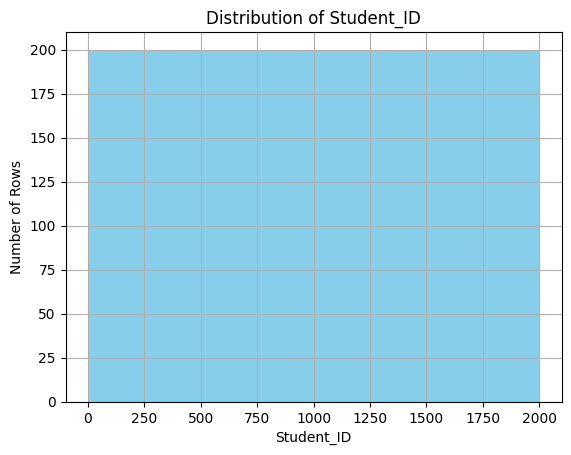

In [128]:
import matplotlib.pyplot as plt

column_to_plot = numeric_cols[0]
df[column_to_plot].hist(bins=10, color='skyblue')
plt.title(f"Distribution of {column_to_plot}")
plt.xlabel(column_to_plot)
plt.ylabel("Number of Rows")
plt.show()



## 4. Data Preprocessing

Machine learning models can only work with numerical data. Therefore, preprocessing is required to transform the dataset into a machine-readable format.

In this step, we:

1. Encoded categorical variables using One-Hot Encoding

2. Converted all features into numerical form

3. Separated features (X) and target (y)

This step makes the dataset fully compatible with machine learning algorithms.

In [129]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level_Low,Stress_Level_Moderate
0,1,6.9,3.8,8.7,2.8,1.8,2.99,False,True
1,2,5.3,3.5,8.0,4.2,3.0,2.75,True,False
2,3,5.1,3.9,9.2,1.2,4.6,2.67,True,False
3,4,6.5,2.1,7.2,1.7,6.5,2.88,False,True
4,5,8.1,0.6,6.5,2.2,6.6,3.51,False,False


In [130]:
X = df_encoded.drop(['Stress_Level_Low', 'Stress_Level_Moderate'], axis=1)
y = df_encoded['Stress_Level_Moderate']


## 5. Exploratory Data Analysis (EDA)
Exploratory Data Analysis helps in understanding patterns and relationships in the data.

In this step, we:

1. Observed feature distributions

2. Analyzed relationships between lifestyle factors and stress levels

3. Identified important features influencing stress

EDA provides insights that guide model selection and improvement.


In [131]:
df_encoded.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


## 6. Model Selection & Training

For this project, we selected a supervised machine learning algorithm to predict student stress levels.

Steps performed:

1. Split the dataset into training and testing sets

2. Trained the model using training data

3. Learned relationships between features and stress levels

This step allows the model to generalize and make predictions on unseen data.

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [133]:
import pandas as pd

df = pd.read_csv("student_lifestyle_dataset.csv")


In [134]:
df = pd.read_csv("cleaned_dataset.csv")
df.head()


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level_Low,Stress_Level_Moderate
0,1,6.9,3.8,8.7,2.8,1.8,2.99,False,True
1,2,5.3,3.5,8.0,4.2,3.0,2.75,True,False
2,3,5.1,3.9,9.2,1.2,4.6,2.67,True,False
3,4,6.5,2.1,7.2,1.7,6.5,2.88,False,True
4,5,8.1,0.6,6.5,2.2,6.6,3.51,False,False


In [135]:
X = df.drop(['Stress_Level_Low', 'Stress_Level_Moderate'], axis=1)
y = df['Stress_Level_Moderate']


In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [137]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## 7. Model Evaluation
Model evaluation is used to measure how well the trained model performs.

In this step, we:

1. Evaluated the model using performance metrics

2. Compared predicted values with actual values

3. Assessed the model’s accuracy and reliability

A good evaluation score indicates that the model can be trusted for real-world use.


In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)


array([[220,  53],
       [ 87,  40]])

In [139]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.65


In [140]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm


array([[220,  53],
       [ 87,  40]])

In [141]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.72      0.81      0.76       273
        True       0.43      0.31      0.36       127

    accuracy                           0.65       400
   macro avg       0.57      0.56      0.56       400
weighted avg       0.63      0.65      0.63       400



In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [143]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [144]:
dt_pred = dt_model.predict(X_test)


In [145]:
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       273
        True       1.00      1.00      1.00       127

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [146]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [147]:
rf_pred = rf_model.predict(X_test)


In [148]:
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       273
        True       1.00      1.00      1.00       127

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [149]:
best_model = rf_model


In [150]:
import pandas as pd

feature_importance = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


,0
Study_Hours_Per_Day,0.606064
Sleep_Hours_Per_Day,0.195039
GPA,0.079405
Physical_Activity_Hours_Per_Day,0.046123
Social_Hours_Per_Day,0.030025
Student_ID,0.023971
Extracurricular_Hours_Per_Day,0.019373


<Axes: >

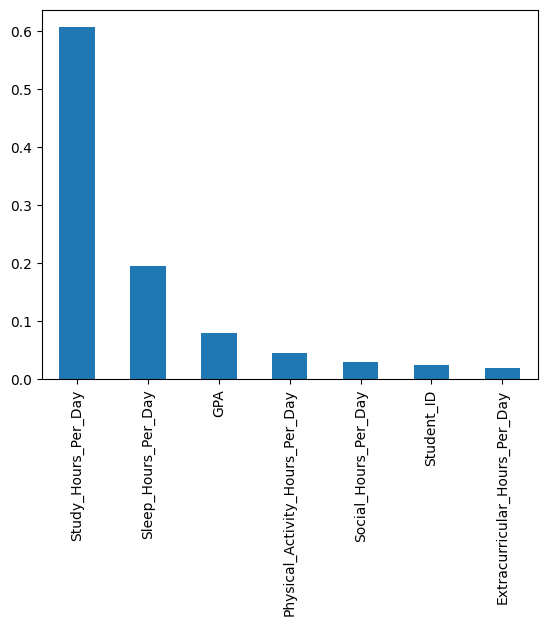

In [151]:
feature_importance.head(10).plot(kind='bar')


## 8. Conclusion
In this project, we successfully built a machine learning model to predict student stress levels based on daily habits. The project highlights the importance of data preprocessing, model training, and evaluation in solving real-world problems.

This system can be extended further by:

1. Adding more psychological factors

2. Using advanced machine learning models

3. Deploying it as a web application